In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

def get_graph(country, T):
    directory = 'media_distance_metrics_US_standing_in_the_world/'+T+'/'+country+'/'
    edges = pd.read_csv(directory+'edge.csv')

    node = pd.read_csv(directory+'node.csv')
    print(node)

    G = nx.Graph()

    for row in edges.T.columns.values:
        vals = edges.loc[row]

        #print(vals["Source"], vals['Target'], vals['Weight'])

        G.add_edge(str(vals["Source"]), str(vals['Target']), weight = 1/vals['Weight'])
        #G.add_edge(node.loc[vals["Source"],'Label'], node.loc[vals['Target'],'Label'], weight = vals['Weight'])

    return G

In [3]:
475/3 + (505*2)/3

495.0

trust Belarus
    Source  Target        Type     Weight
0        0       1  Undirected  35.079614
5        1       2  Undirected  33.069698
9        2       3  Undirected  26.118446
4        0       5  Undirected  20.385549
10       2       4  Undirected  19.799408
2        0       3  Undirected  14.748354
11       2       5  Undirected  13.993649
3        0       4  Undirected  13.091091
6        1       3  Undirected  11.103549
13       3       5  Undirected  10.885980
14       4       5  Undirected   8.317833
7        1       4  Undirected   7.551142
1        0       2  Undirected   7.442505
8        1       5  Undirected   1.960295
12       3       4  Undirected   0.445958


ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 12.

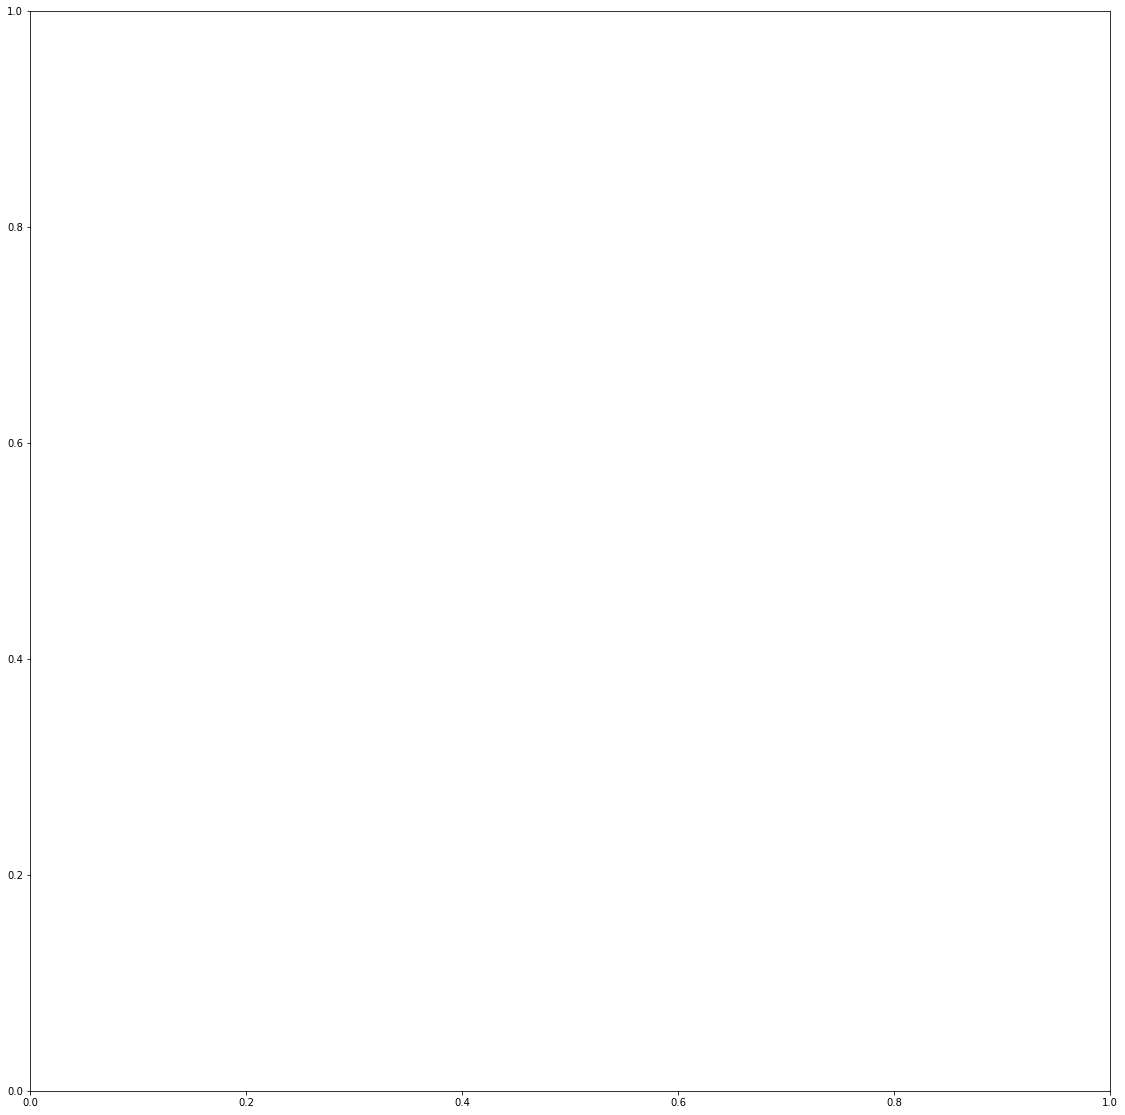

In [45]:
country = "Belarus"
#country = "Georgia"
#country = "Ukraine"

T = 'trust'# #'
T = 'sources'

n=1
for T in ['sources','trust'][1:]:
    #
    G = nx.star_graph(5)
    #labeldict = {}
    
    colormap = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    plt.figure(1,figsize=(15, 15))
    
    n_countries=1
    
    
    
    for country in ['Belarus', 'Ukraine', 'Georgia']:
        print(T, country)
        
        directory = 'media_distance_metrics_US_standing_in_the_world/'+T+'/'+country+'/'
        edges = pd.read_csv(directory+'edge.csv')
        print(edges.sort_values('Weight',ascending=False))
        #print(edges)
        
        edges = edges[edges.Source == 0]

        node = pd.read_csv(directory+'node.csv')
        #print(node)
        
        for row in edges.T.columns.values:
            vals = edges.loc[row]

            #print(vals["Source"], vals['Target'], vals['Weight'])

            G.add_edge(country[:1]+str(vals["Source"]), country[:1]+str(vals['Target']), weight = 1/vals['Weight'])
            
            #labeldict[country+str(vals["Source"])] = str(vals["Source"])
            #G.add_edge(node.loc[vals["Source"],'Label'], node.loc[vals['Target'],'Label'], weight = vals['Weight'])
        
        #G = get_graph(country, T)
        
        #plt.figure(1)
        pos = nx.spring_layout(G, k=0.5)
        
        #nx.relabel_nodes(G, labeldict, copy=True)
        
        nx.draw(G, node_color=np.tile(colormap, n_countries), with_labels=True, pos = pos, node_size=500)# labels=labeldict,
        n_countries+=1
        for v,col in zip(range(6), colormap):
            plt.scatter([],[], color = col, label=node.loc[v].values[1])

        #n+=1
        plt.legend(bbox_to_anchor=(1.,1.))
        
        directory = 'plots/'
        if not os.path.exists(directory): os.makedirs(directory)
            
        plt.show()

        #plt.tight_layout()
        #plt.savefig(directory+T+'.png', bbox_inches='tight')
        #plt.close()

In [86]:
import survey_utils

node_focus = None#'Russian Media'
use_real_labels = True
combine_countrys = False
sort = True



save_directory = 'media_ecosytem_tables/'
survey_utils.create_directory(save_directory)

#list_df=[]
for country in ['Belarus', 'Ukraine', 'Georgia']:
    
    directory = 'media_distance_metrics_US_standing_in_the_world/'+T+'/'+country+'/'
    edges = pd.read_csv(directory+'edge.csv')
    node = pd.read_csv(directory+'node.csv')
    
    if node_focus:
        node_focus_n = node[node.Label == node_focus].Id.values[0]
        edges_country = edges[(edges.Source == node_focus_n) | (edges.Target == node_focus_n)]
        
    if not node_focus:
        edges_country = edges
    
    if use_real_labels:
        d = dict(zip(node.Id, node.Label))
        edges_country = edges_country.replace(d)
        
    if sort:
        edges_country = edges_country.sort_values('Weight',ascending=False)
        
    #remove 'Type' column
    edges_country=edges_country.drop('Type',1)
    
    #round the values to 2 dp
    edges_country = edges_country.round(2)
        

    if combine_countrys:
        edges_country['Country'] = country
        list_df.append(edges_country)
        
    if not combine_countrys:
        survey_utils.save_txt(edges_country.to_latex(index=False), save_directory +'distances_tex_{c}.tex'.format(c=country))
        edges_country.to_csv(save_directory+'distances_csv_{c}.csv'.format(c=country))
        
        
if combine_countrys:
    edges_country = pd.concat(list_df)
    survey_utils.save_txt(edges_country.to_latex(index=False), save_directory +'distances_tex.tex')
    edges_country.to_csv(save_directory+'distances_csv.csv')

/Users/damianruck/opt/anaconda3/envs/networks/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [85]:
edges_country

,Source,Target,Weight
8,Social Media,People you Know,3.30
9,National Mass Media,National Digital media,2.86
4,Russian Media,People you Know,2.51
11,National Mass Media,People you Know,2.19
3,Russian Media,Russian Digital media,2.12
10,National Mass Media,Russian Digital media,2.07
7,Social Media,Russian Digital media,1.95
6,Social Media,National Digital media,1.84
13,National Digital media,People you Know,1.82
1,Russian Media,National Mass Media,1.61


In [60]:
d

{0: 'Russian Media',
 1: 'Social Media',
 2: 'National Mass Media',
 3: 'National Digital media',
 4: 'Russian Digital media',
 5: 'People you Know'}

In [57]:
dict(d)

{0: 'Russian Media',
 1: 'Social Media',
 2: 'National Mass Media',
 3: 'National Digital media',
 4: 'Russian Digital media',
 5: 'People you Know'}